## Business understanding

In this analysis, I want to get a better understanding of the trends in the type of online courses that people are more likely to subscribe to. The dataset used for this analysis is taken from Kaggle which contains details of courses published on Udemy. Using this dataset I will try to answer the following questions:

#### 1. What subject do the most subscribed courses belong to?
#### 2. Which level of the courses gets more subscribers?
#### 3. Does the number of subscribers depend upon the duration of course?

Let's start by importing the libraries required to answer the above mentioned questions.


In [1]:
import numpy as np , pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


plt.style.use('seaborn-white')
sns.set(rc={'figure.figsize':(8,8)})


## Data understanding and reading

Now that we've succesfully imported the libraries, we are ready to load the dataset and do some exploring.

In [2]:
df=pd.read_csv('Datasets/udemy_courses.csv')
print(df.shape)


(3678, 12)


The dataset has 3678 rows and 12 columns. Lets check what columns are include within the dataframe.

In [3]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [4]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Each course belongs to a subject and requires the student to have a certain level of prior knowledge to make it more easier for them to understand that particular course.

Let's check if we have any missing entries here.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


There's no missing values so we're good to go ahead.

# Preparing Data and Evaluating Results

To answer the questions mentioned above, we'll only be needing a subset of the columns.

In [6]:
Cols=['course_title','num_subscribers','level','content_duration','subject']
df_subset=df[Cols]

In [7]:
df_subset.head()

,course_title,num_subscribers,level,content_duration,subject
0,Ultimate Investment Banking Course,2147,All Levels,1.5,Business Finance
1,Complete GST Course & Certification - Grow You...,2792,All Levels,39.0,Business Finance
2,Financial Modeling for Business Analysts and C...,2174,Intermediate Level,2.5,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,2451,All Levels,3.0,Business Finance
4,How To Maximize Your Profits Trading Options,1276,Intermediate Level,2.0,Business Finance


In [8]:
len(df_subset['course_title'].unique())

3663

In [9]:
df_subset.subject.value_counts() # Number of courses belonging to each subject

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

Now we know that Web Development and Business Finance have most number of courses.

## Top subscribed courses

Let's sort the dataset by "num_subscribers" columns and retrieve the top 10 subscribed courses.

In [27]:
def top_subscribed_courses(df,n):
    '''
    Find the top n subscribed courses
    
    INPUT:
            df - The dataframe in which to search
            n - The number of courses to look for
    OUTPUT:
            Top_df - The dataframe with the result of top n subscribed courses
    '''
    Top_df = df.sort_values(by=["num_subscribers"]).tail(n)
    
    return Top_df

In [28]:
top10 = top_subscribed_courses(df_subset,10)

<AxesSubplot:xlabel='num_subscribers', ylabel='course_title'>

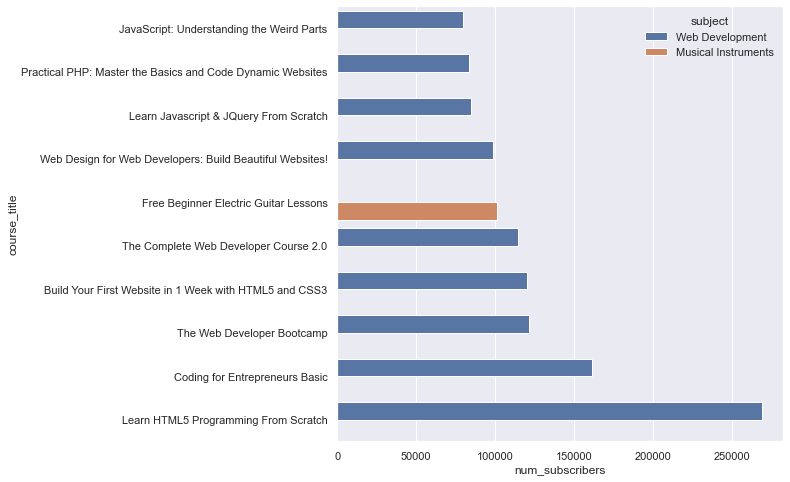

In [29]:
sns.barplot(x = "num_subscribers",y = "course_title", hue="subject",data = top10)

As we can see, majority of these courses belong the subject of Web Development and only one of them belongs to the subject Musical Instruments.
Interestingly, there aren't any course from the subject Business Finance.

Let's extend the search a little bit and retrieve the results for top 20 subscribed courses.

<AxesSubplot:xlabel='num_subscribers', ylabel='course_title'>

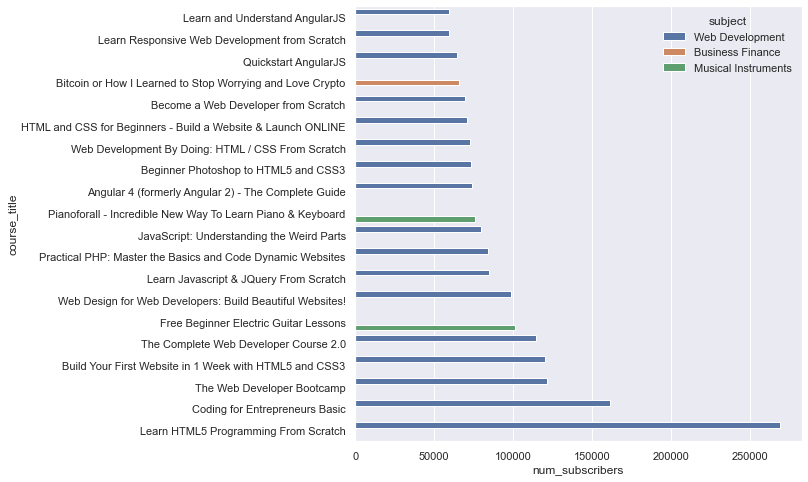

In [13]:
top20 = top_subscribed_courses(df_subset,20)
sns.barplot(x = "num_subscribers",y = "course_title", hue="subject",data = top20)

This depicts that even though Business Finance subject has almost twice the number of courses than Musical Instruments subject. It’s barely in the top 20 subscribed courses
But the above results still doesn’t mean that Musical Instruments courses have more subscriber than Business Finance courses overall.To answer this let’s check number of subscribers per subject.

In [14]:
df_subject_subscribers=df_subset.groupby(by="subject")["num_subscribers"].sum()

In [15]:
df_subject_subscribers=df_subject_subscribers.reset_index()
df_subject_subscribers=df_subject_subscribers.sort_values(by=["num_subscribers"])
df_subject_subscribers

,subject,num_subscribers
2,Musical Instruments,846689
1,Graphic Design,1063148
0,Business Finance,1868711
3,Web Development,7980572


<AxesSubplot:xlabel='num_subscribers', ylabel='subject'>

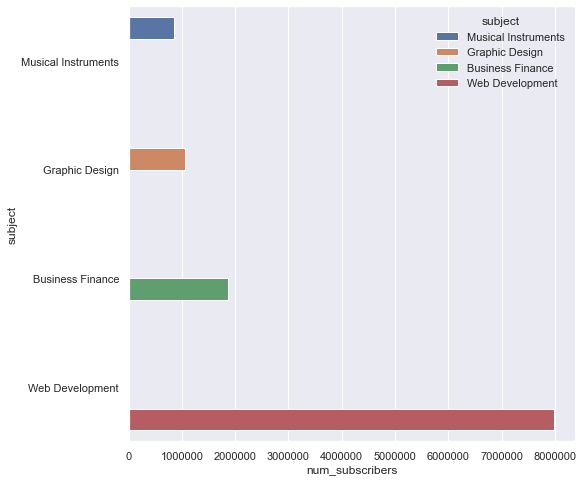

In [16]:
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x = "num_subscribers",y = "subject",hue = "subject", data = df_subject_subscribers)

As we can see here Web Development still stays at the top in terms of number of subscribers and Business Finance having 2nd most number of courses is still far behind in terms of subscriber count.


## Which level of the courses gets more subscribers?

In [17]:
df_subset['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

The courses belong to one of the 4 levels.

In [18]:
df_subset.head()

,course_title,num_subscribers,level,content_duration,subject
0,Ultimate Investment Banking Course,2147,All Levels,1.5,Business Finance
1,Complete GST Course & Certification - Grow You...,2792,All Levels,39.0,Business Finance
2,Financial Modeling for Business Analysts and C...,2174,Intermediate Level,2.5,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,2451,All Levels,3.0,Business Finance
4,How To Maximize Your Profits Trading Options,1276,Intermediate Level,2.0,Business Finance


In [30]:
def find_most_subscribed_level(df):
    '''
    Finding subscriber count(in descending order) for all the levels
    
    INPUT:
        df- The dataframe containing the subscribers and levels data
        
    OUTPUT:
        df_sub_level - dataframe with subscriber count for each level in desc order    
    '''
    sub_level={}
    for l in df['level'].unique(): # iterating over each level
        sub_level[l]=df[df.level==l]['num_subscribers'].sum() # storing the total num of subscribers in that particular level.

    df_sub_level=pd.DataFrame({'num_subscribers': sub_level})
    df_sub_level.sort_values(by='num_subscribers',ascending=False,inplace=True)
    
    return df_sub_level

In [31]:
df_sub_level=find_most_subscribed_level(df)
df_sub_level

,num_subscribers
All Levels,6915076
Beginner Level,4051843
Intermediate Level,742005
Expert Level,50196


<AxesSubplot:xlabel='num_subscribers'>

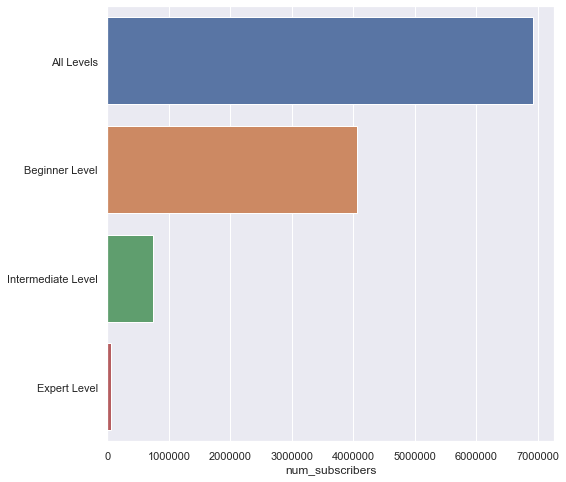

In [32]:
# Plotting the dataframe for visualization
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x = "num_subscribers",y = df_sub_level.index, data = df_sub_level)

In [41]:
#Above results can also be achieved using the below lines of code

#df_level_subscribers=df_subset.groupby(by="level")["num_subscribers"].sum()
#df_level_subscribers=df_subject_subscribers.reset_index()
#df_level_subscribers=df_subject_subscribers.sort_values(by=["num_subscribers"])
#plt.ticklabel_format(style='plain', axis='x')
#sns.barplot(x = "num_subscribers",y = "level",hue = "level", data = df_level_subscribers)

The courses that belong to the level "All Levels" and "Beginner Level" has most number of subscribers.

## Does the number of subscribers depend upon the duration of course?

To answer this question, we can use seaborn's scatterplot library using which we could get a better understanding of the relationship between "num of subscribers" and "content durations".

<AxesSubplot:xlabel='content_duration', ylabel='num_subscribers'>

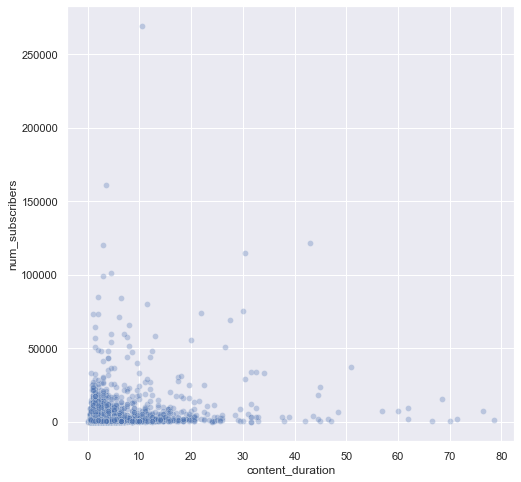

In [35]:

sns.scatterplot(x='content_duration',y='num_subscribers',alpha=0.3,data=df_subset)

We can clearly understand by the above plot that the courses that are shorter in terms of duration has most number of subscribers in comparison to the courses that are of longer durations.

## Data Modeling

Since I am not using any machine learning to answer the questions, there is no data modeling.